In [12]:
import torch
import numpy as np

from torchvision import datasets
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from torchvision import transforms

### Loading Data

In [2]:
# path to store data and/or load from
path2data="./data"

# loading training data
train_data=datasets.MNIST(path2data, train=True, download=True)

In [3]:
# extract data and targets
x_train, y_train=train_data.data,train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [4]:
# loading validation data
val_data=datasets.MNIST(path2data, train=False, download=True)

In [5]:
# extract data and targets
x_val,y_val=val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [6]:
# add a dimension to tensor to become B*C*H*W
if len(x_train.shape)==3:
    x_train=x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape)==3:
    x_val=x_val.unsqueeze(1)
print(x_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


In [8]:
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    
    # Convert to H*W*C shape
    npimg_tr=np.transpose(npimg, (1,2,0))
    
    plt.imshow(npimg_tr,interpolation='nearest')

torch.Size([3, 200, 314])


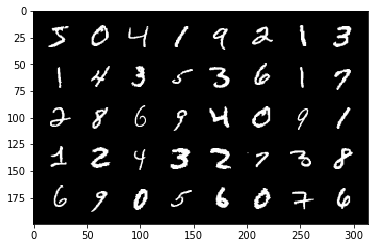

In [10]:
# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=10)
print(x_grid.shape)

# call helper function
show(x_grid)

### Data transformations

In [13]:
# loading MNIST training dataset
train_data=datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=1),
        transforms.RandomVerticalFlip(p=1),
        transforms.ToTensor(),
    ])

Text(0.5, 1.0, 'transformed')

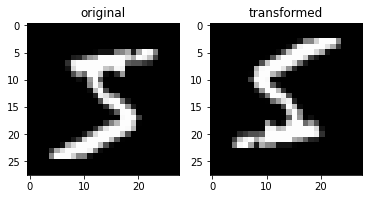

In [14]:
# get a sample image from training dataset
img = train_data[0][0]

# transform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray");
plt.title("transformed")

In [15]:
# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(1),
        transforms.RandomVerticalFlip(1),
        transforms.ToTensor(),
    ])

# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True, transform=data_transform )

### Wrapping tensors into a dataset

In [16]:
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
    print(x.shape,y.item())
    break

torch.Size([1, 28, 28]) 5


In [17]:
### Creating a DataLoader
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])
